# Uebung 4 Mehrklassenklassifikation mit Neuronalen Netzen


## Imports

In [62]:
import os
import csv
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Globale Variablen
Definiere an dieser Stelle alle Variablen, die global verwendet werden, z.B.: Pfadnamen

In [3]:
# Define path to data
DATA_PATH = "../data/GTSRB/Final_Training/Images"

## Datenaufbereitung
Hinweise findest du hier: https://keras.io/getting_started/intro_to_keras_for_engineers/#data-loading-amp-preprocessing

In [82]:
def readTrafficSigns(rootpath):
    """
    Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    
    """
    
    images = []
    labels = []
    
    # loop over all 42 classes
    for c in range(0,43):
        # subdirectory for class
        prefix = rootpath + '/' + format(c, '05d') + '/'
        
        # annotations file
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv')
        
        # csv parser for annotations file
        gtReader = csv.reader(gtFile, delimiter=';')
        
        # Skip header
        next(gtReader)
        
        # loop over all images in current annotations file
        for row in gtReader:
            # the 1th column is the filename
            images.append(plt.imread(prefix + row[0]))
            
            # the 8th column is the label
            labels.append(row[7])
            
        gtFile.close()
    
    return images, labels

def resizeImages(images, width=32, height=32):
    """
    Resize image to unify dimensions of the images
    
    """
    # Initialization
    unified_img = []
    
    # Resize images
    for img in images:
        img = img.copy()
        unified_img.append(cv2.resize(img, (width, height)))
        
    print("Image Size: {} x {}".format(width, height))
        
    return unified_img, width, height

def plotImages(X, title, width=32, height=32):
    
    fig, axes = plt.subplots(
        3,15,
        figsize=(15,3),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.01, wspace=0.01)
    )

    for i, ax in enumerate(axes.flat):
        ax.imshow(X[i], cmap="gray")
        ax.text(2, 30, str(i), fontsize=12, c="white")
        
    fig.suptitle(title, fontsize=10)
    
def one_hot_encode(y):
    """
    Converts featuers from List of strings to one hot encoded labels
    """
    
    class_ids = y.astype(np.int)
    encoded = pd.get_dummies(class_ids).to_numpy()
    
    return encoded
        
def preprocessData(rootpath):
    """
    Loads the data and performs necessary preprocessing steps
    
    Parameters
    ----------
    path to the traffic sign data, for example './GTSRB/Training'
    
    Returns
    -------
    X_train : numpy.Array
    X_test  : numpy.Array
    y_tain  : numpy.Array
    y_test  : numpy.Array
    
    """
    
    # Load Data
    images, labels = readTrafficSigns(rootpath)
    
    # Unify image dimensions
    unified_img, max_width, max_height = resizeImages(images, width=32, height=32)
    
    # Convert list of labels to array of labels
    unified_img = np.array(unified_img)
    labels = np.array(labels)
    
    # Perform train test split
    X_train, X_test, y_train, y_test = train_test_split(unified_img, labels, test_size=0.25, random_state=42)
    
    # One hot encode labels
    y_train = one_hot_encode(y_train)
    y_test = one_hot_encode(y_test)
    
    return X_train, X_test, y_train, y_test

Image Size: 32 x 32
X_train.shape = (29406, 32, 32, 3)
y_tain.shape = (29406, 43)
X_test.shape = (9803, 32, 32, 3)
y_test.shape = (9803, 43)


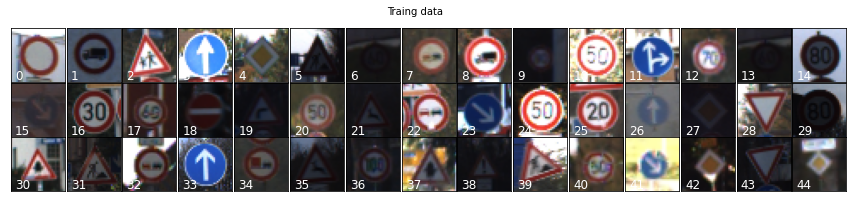

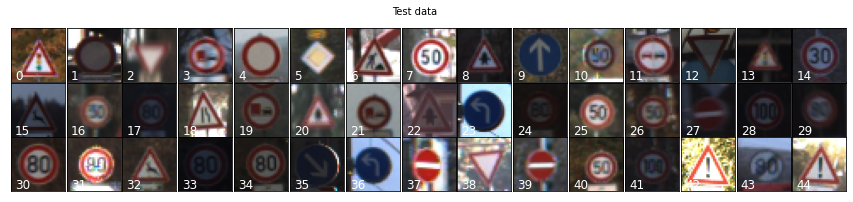

In [87]:
# Read all the Traffic Sign data
X_train, X_test, y_train, y_test = preprocessData(DATA_PATH)

print("X_train.shape = {}".format(X_train.shape))
print("y_tain.shape = {}".format(y_train.shape))
print("X_test.shape = {}".format(X_test.shape))
print("y_test.shape = {}".format(y_test.shape))

# Plot first 44 examples of X_train and X_test
plotImages(X_train, title="Traing data")
plotImages(X_test, title="Test data")

## Aufbau des Modells
Zum Aufbau deines Modells kannst du dich an die gezeigten Beispiele richten. Implementiere zuerst ein einfaches Modell, welches du je nach Performance erweitern kannst. 

Unten findest du die Auflistung der Schichten (Layers), die du für dein Modell miteinander kombinieren kannst. 


class RoadSignClassifier:Überlege dir, welche Layers für die Klassifikationsaufgabe mit HOG-Features gut sind und welche Layer sich für die Klassifikationsaufgabe mit ppm-Dateien eignen.

In [102]:
class RoadSignClassifier:
    
    def createModel(width, height, depth, classes):
        """
        Creates Sequential model using tensorflow keras
        """
        
        # Define input shape
        inputShape = (height, width, depth)
        
        # Initialize model
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Conv2D(8, (5, 5), input_shape=inputShape, activation="relu"))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Conv2D(16, (3, 3), activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(16, (3, 3), activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(512, activation="relu"))
        model.add(tf.keras.layers.Dense(classes, activation="softmax"))
        
        return model
    
    def plotLossHistory(training_hist, title_name):
        loss_history = training_hist.history['loss']
        validation_loss = training_hist.history['val_loss']

        %matplotlib inline
        plt.figure(dpi=90)
        plt.semilogy(loss_history)
        plt.semilogy(validation_loss)
        plt.title(title_name)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend(['loss', 'validation_loss'])
        #plt.savefig(filename)
        plt.show()
        

In [98]:
# Perform data augmentation on the data, to increase the diversity of your training set 
# by applying random (but realistic) transformations, such as image rotation.
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False
)

In [100]:
# Defining hyperparameters
epochs = 20
learning_rate = 0.001
batch_size = 64

# Create Model
model = RoadSignClassifier.createModel(width=32, height=32, depth=3, classes=43)

# Define optimizer
optimizer = tf.keras.optimizers.Adam(lr=learning_rate, decay=learning_rate / (epochs))

# Compile model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Specify early stopping criterion
callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=3,
        restore_best_weights=True
    )

# Fit model
training_hist = model.fit(
    data_augmentation.flow(X_train, y_train, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=callback
    verbose=1
)

/var/folders/0v/_s7dyyxx7w7191wrn82sg08m0000gn/T/ipykernel_10754/3335105281.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fit = model.fit_generator(


Epoch 1/20
460/460 [==============================] - 25s 52ms/step - loss: 1.7362 - accuracy: 0.5103 - val_loss: 0.5512 - val_accuracy: 0.8290
Epoch 2/20
460/460 [==============================] - 21s 46ms/step - loss: 0.7291 - accuracy: 0.7672 - val_loss: 0.2084 - val_accuracy: 0.9401
Epoch 3/20
460/460 [==============================] - 25s 53ms/step - loss: 0.4750 - accuracy: 0.8481 - val_loss: 0.1424 - val_accuracy: 0.9535
Epoch 4/20
460/460 [==============================] - 28s 61ms/step - loss: 0.3577 - accuracy: 0.8854 - val_loss: 0.1261 - val_accuracy: 0.9596
Epoch 5/20
460/460 [==============================] - 27s 58ms/step - loss: 0.2870 - accuracy: 0.9085 - val_loss: 0.1248 - val_accuracy: 0.9585
Epoch 6/20
460/460 [==============================] - 25s 53ms/step - loss: 0.2558 - accuracy: 0.9171 - val_loss: 0.0674 - val_accuracy: 0.9797
Epoch 7/20
460/460 [==============================] - 25s 54ms/step - loss: 0.2067 - accuracy: 0.9341 - val_loss: 0.0712 - val_accuracy:

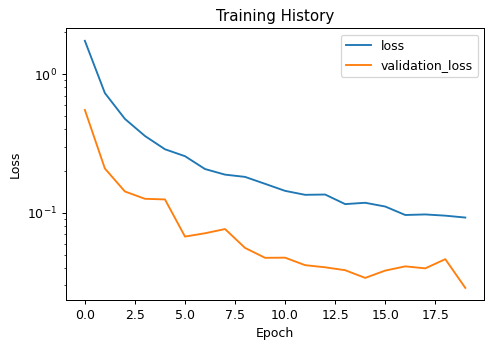

In [104]:
title_name = "Training History"
RoadSignClassifier.plotLossHistory(training_hist, title_name)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(xyz))
model.add(layers.Activation(xyz))
model.add(layers.Conv2D(xyz))
model.add(layers.Activation(xyz))
model.add(layers.MaxPooling2D(xyz))
model.add(layers.Dropout(xyz))
model.add(layers.Flatten())
model.add(layers.Dense(xyz))

model.add(layers.Activation('softmax'))

## Kompilieren des Modells
Eine detaillierte Beschreibung der [compile](https://keras.io/api/models/model_training_apis/#compile-method)-Methode findest du in Keras API Referenz.

In [ ]:
# Defining hyperparameters
epochs = 20
learning_rate = 0.001
batch_size = 64

## Training des Modells
Eine detaillierte Beschreibung der [fit](https://keras.io/api/models/model_training_apis/#fit-method)-Methode findest du in Keras API Referenz.

## Evaluation des Modells
Eine detaillierte Beschreibung der [evaluate](https://keras.io/api/models/model_training_apis/#evaluate-method)-Methode findest du in Keras API Referenz.

Nach der Anwendung der *evaluate*-Methode kannst du dir zusätzlich den ausfuehrlichen Klassifikationsbericht (*classification_report()*) sowie die Konfusionsmatrix (*confusion_matrix()*) anschauen.  

In [ ]:
# Evaluiere das trainierte Modell mit den Testdaten


## Speichern des trainierten Modells
Zum Speichern des trainierten Modells kann *save*-Methode
Weiterfuehrende Informationen zu dieser Methode unter folgendem [Link](https://keras.io/api/models/model_saving_apis/) zu finden. 

In [ ]:
# Speichere das trainierte Modell, um dessen Wiederverwendung zu ermoeglichen


## Nutzen des trainierten Modells zum Vorhersagen von Verkehrszeichen-Klassen 
Zum Wiederverwenden des trainierten gespeicherten Modells kann die [load_model](https://keras.io/api/models/model_saving_apis/#loadmodel-function)-Funktionverwendet werden.

Eine detaillierte Beschreibung der [predict](https://keras.io/api/models/model_training_apis/#predict-method)-Methode findest du in Keras API Referenz.

In [ ]:
# Lade das trainierte Modell und teste die Erkennung der Verkehrszeichen-Klassen mit eigenen Beispielen
